In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Chart of values: This part of the notebook is for troubleshooting and graphical analysis.

In [3]:
raw_fuel_data=pd.read_csv(r'C:\Users\Jose.Hurtado\Documents\projects\data\zonar\SSX896.csv',sep=';',encoding='latin1')
raw_fuel_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Created  1531 non-null   str  
 1   Message  1531 non-null   str  
 2   Status   1531 non-null   str  
dtypes: str(3)
memory usage: 36.0 KB


In [4]:
e0x=raw_fuel_data[raw_fuel_data['Status'].str.contains('3E0')]
row_number=e0x.shape[0]
#e0x.to_csv('/home/jlhb1984/py-projects/data/veepo/wcr728_.csv')

In [5]:
fs01_dec_value=[]
fs02_dec_value=[]
last_index_fs01=[]
last_index_fs02=[]


for i in range(0,row_number):
    e0x_aux=e0x.iloc[i,2]
    aux=e0x_aux.find('3E01')
    if len(e0x_aux)>0:
        fs01=(e0x_aux[aux:aux+18])
        if len(fs01)>17:
            msb=fs01[10:12]
            lsb=fs01[8:10]
            measure=msb+lsb
            fs01_dec_value.append(int(measure,16))
            last_index_fs01=i
            
print(i, raw_fuel_data.iloc[i,0] )

for i in range(0,row_number):
    e0x_aux=e0x.iloc[i,2]
    aux=e0x_aux.find('3E02')
    if len(e0x_aux)>0:
        fs02=e0x_aux[aux:aux+18]
        if len(fs02)>17:
            msb=fs02[10:12]
            lsb=fs02[8:10]
            measure=msb+lsb
            fs02_dec_value.append(int(measure,16))
            last_index_fs02=i
            
        #print(fs01_cad)   

fs01_count=len(fs01_dec_value)
fs02_count=len(fs02_dec_value)
#print('El Ncode en decimal es:')
#print(fs02_dec_value,fs02_count)
print("Last fuel report fs01: ",e0x.iloc[last_index_fs01,0],"Last fuel report fs02: ",e0x.iloc[last_index_fs02,0])

1298 2026-02-16 14:01:17.066
Last fuel report fs01:  2026-02-16 17:12:21.916 Last fuel report fs02:  2026-02-16 17:12:15.558


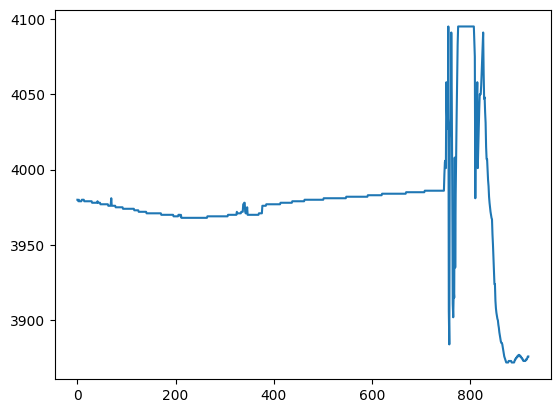

In [6]:
fs01_x_values=[]
fs02_x_values=[]

for i in range(0,fs01_count):
    fs01_x_values.append(i)
    
for i in range(0,fs02_count):
    fs02_x_values.append(i)

plt.plot(fs01_x_values,fs01_dec_value)
#plt.plot(fs02_x_values,fs02_dec_value)

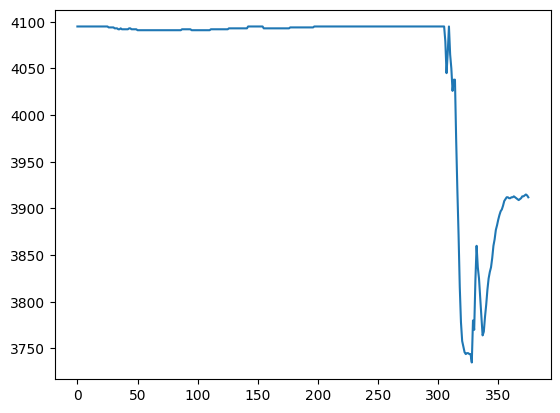

In [7]:
plt.plot(fs02_x_values,fs02_dec_value)
#plt.plot(fs02_x_values,fs02_dec_value)